# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[30, 62, 83, ..., 91, 15, 85],
       [36, 13, 37, ..., 93, 22, 50],
       [75, 20, 10, ..., 95, 14, 99],
       ...,
       [ 0, 42, 64, ..., 86, 26, 86],
       [72,  5, 54, ..., 33, 53, 29],
       [40, 16, 68, ...,  8, 87, 44]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
B = A[:, np.random.permutation(A.shape[1])]
B

array([[42, 11, 15, ..., 96, 62, 86],
       [71, 86, 22, ..., 79, 13, 18],
       [56, 20, 14, ..., 95, 20, 80],
       ...,
       [64, 91, 26, ..., 41, 42,  4],
       [ 1, 22, 53, ..., 45,  5,  6],
       [25, 58, 87, ..., 66, 16, 68]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [7]:
x = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
x
mean = x[:, 1::2]
mean_arr = mean.mean(axis=1)
mean_arr
sum_in_row = x[:, ::2].sum(axis=1)
sum_in_row
sum_in_row > mean_arr
x[sum_in_row > mean_arr]

array([[ 6,  7,  8,  9, 10],
       [ 1,  2,  5,  4,  5]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [23]:
test = np.array([[1, 200, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
hd = np.max(test,axis=1)
ld = np.min(test, axis=1)
print((hd-ld).argmax())

0


# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [58]:
test = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])


In [67]:
np.argsort(np.argsort(test, axis=None).reshape(test.shape), axis=None).reshape(test.shape) + 1

array([[ 2, 19,  6,  7,  1],
       [ 3, 20, 11, 14, 16],
       [12, 13, 15, 17, 18],
       [ 4,  5,  9,  8, 10]], dtype=int64)

In [66]:
P = np.argsort(test, axis=None).reshape(test.shape)
result = test.copy().reshape(1, 20)
k = 1
for i in range(len(P)):
    for j in range(len(P[0])):
        result[0][b[i][j]] = k
        k += 1

print(result.reshape(test.shape))

IndexError: index 60 is out of bounds for axis 0 with size 20

In [61]:
np.argsort(P, axis=None).reshape(test.shape)+1

array([[ 2, 19,  6,  7,  1],
       [ 3, 20, 11, 14, 16],
       [12, 13, 15, 17, 18],
       [ 4,  5,  9,  8, 10]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [68]:
np.transpose((A.T - np.min(A, axis=1)) / (np.max(A, axis=1) - np.min(A, axis=1)))

array([[0.3030303 , 0.62626263, 0.83838384, ..., 0.91919192, 0.15151515,
        0.85858586],
       [0.33684211, 0.09473684, 0.34736842, ..., 0.93684211, 0.18947368,
        0.48421053],
       [0.75757576, 0.2020202 , 0.1010101 , ..., 0.95959596, 0.14141414,
        1.        ],
       ...,
       [0.        , 0.42424242, 0.64646465, ..., 0.86868687, 0.26262626,
        0.86868687],
       [0.7244898 , 0.04081633, 0.54081633, ..., 0.32653061, 0.53061224,
        0.28571429],
       [0.44444444, 0.17777778, 0.75555556, ..., 0.08888889, 0.96666667,
        0.48888889]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [87]:
test = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
print(test)
np.concatenate((test, test*2, test*3, test*4, test*5, test*6, test*7, test*8, test*9, test*10)).reshape(10, test.shape[1], test.shape[0])

[[  1  20   3   4   0]
 [  1 136   5   7   8]
 [  6   7   8   9  10]
 [  1   2   5   4   5]]


array([[[   1,   20,    3,    4],
        [   0,    1,  136,    5],
        [   7,    8,    6,    7],
        [   8,    9,   10,    1],
        [   2,    5,    4,    5]],

       [[   2,   40,    6,    8],
        [   0,    2,  272,   10],
        [  14,   16,   12,   14],
        [  16,   18,   20,    2],
        [   4,   10,    8,   10]],

       [[   3,   60,    9,   12],
        [   0,    3,  408,   15],
        [  21,   24,   18,   21],
        [  24,   27,   30,    3],
        [   6,   15,   12,   15]],

       [[   4,   80,   12,   16],
        [   0,    4,  544,   20],
        [  28,   32,   24,   28],
        [  32,   36,   40,    4],
        [   8,   20,   16,   20]],

       [[   5,  100,   15,   20],
        [   0,    5,  680,   25],
        [  35,   40,   30,   35],
        [  40,   45,   50,    5],
        [  10,   25,   20,   25]],

       [[   6,  120,   18,   24],
        [   0,    6,  816,   30],
        [  42,   48,   36,   42],
        [  48,   54,   60,    6],
    

In [88]:
A
print(A)
np.concatenate((A, A*2, A*3, A*4, A*5, A*6, A*7, A*8, A*9, A*10)).reshape(10, A.shape[1], A.shape[0])

[[30 62 83 ... 91 15 85]
 [36 13 37 ... 93 22 50]
 [75 20 10 ... 95 14 99]
 ...
 [ 0 42 64 ... 86 26 86]
 [72  5 54 ... 33 53 29]
 [40 16 68 ...  8 87 44]]


array([[[ 30,  62,  83, ...,  35,  57,  62],
        [ 55,  50,  34, ...,  64,  65,  44],
        [ 70,  12,  28, ...,  28,   0,  56],
        ...,
        [  0,  53,  85, ...,  83,  83,  57],
        [ 60,  22,  52, ...,  92,  88,  75],
        [ 52,  52,  38, ...,   8,  87,  44]],

       [[ 60, 124, 166, ...,  70, 114, 124],
        [110, 100,  68, ..., 128, 130,  88],
        [140,  24,  56, ...,  56,   0, 112],
        ...,
        [  0, 106, 170, ..., 166, 166, 114],
        [120,  44, 104, ..., 184, 176, 150],
        [104, 104,  76, ...,  16, 174,  88]],

       [[ 90, 186, 249, ..., 105, 171, 186],
        [165, 150, 102, ..., 192, 195, 132],
        [210,  36,  84, ...,  84,   0, 168],
        ...,
        [  0, 159, 255, ..., 249, 249, 171],
        [180,  66, 156, ..., 276, 264, 225],
        [156, 156, 114, ...,  24, 261, 132]],

       ...,

       [[240, 496, 664, ..., 280, 456, 496],
        [440, 400, 272, ..., 512, 520, 352],
        [560,  96, 224, ..., 224,   0, 448

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [89]:
test = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
print(test)
np.concatenate((test[:, ::2], test[:, 1::2]), axis=1)

[[  1  20   3   4   0]
 [  1 136   5   7   8]
 [  6   7   8   9  10]
 [  1   2   5   4   5]]


array([[  1,   3,   0,  20,   4],
       [  1,   5,   8, 136,   7],
       [  6,   8,  10,   7,   9],
       [  1,   5,   5,   2,   4]])

In [90]:
A
print(A)
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

[[30 62 83 ... 91 15 85]
 [36 13 37 ... 93 22 50]
 [75 20 10 ... 95 14 99]
 ...
 [ 0 42 64 ... 86 26 86]
 [72  5 54 ... 33 53 29]
 [40 16 68 ...  8 87 44]]


array([[30, 83, 14, ..., 42, 91, 85],
       [36, 37, 62, ..., 71, 93, 50],
       [75, 10, 33, ..., 56, 95, 99],
       ...,
       [ 0, 64, 33, ..., 64, 86, 86],
       [72, 54, 56, ...,  1, 33, 29],
       [40, 68, 47, ..., 25,  8, 44]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [86]:
test = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
np.all(test > 5, axis = 1).sum()



1

In [91]:
A
np.all(A> 5, axis = 1).sum()

12

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 5$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [100]:
test = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
print(test)
np.mean(np.array(np.split(test, 4)), axis = 0)

[[  1  20   3   4   0]
 [  1 136   5   7   8]
 [  6   7   8   9  10]
 [  1   2   5   4   5]]


array([[ 2.25, 41.25,  5.25,  6.  ,  5.75]])

In [101]:
A
np.mean(np.array(np.split(A, 10)), axis = 0)

array([[34.7, 62.6, 61.6, 44.6, 47.8, 54.3, 51.4, 45.2, 53.9, 42.4, 41.9,
        61.1, 55.1, 41.3, 47.4, 43.1, 66.3, 53.3, 55.9, 54.7, 52.3, 28.9,
        33.8, 44.2, 46.3, 49.9, 57.4, 35. , 64.6, 53.7, 51.3, 69.2, 56.7,
        47.9, 47.7, 29.1, 57.7, 57. , 33.5, 52.4, 40.4, 58.5, 45.3, 46.2,
        42.2, 64.3, 58.1, 47.1, 52.9, 68.6],
       [51.3, 57. , 45.8, 40.9, 66.6, 47.9, 36.7, 43.1, 52.9, 45. , 25.9,
        37.7, 59.6, 65.5, 43.7, 47.6, 42.9, 58.5, 34.8, 47.7, 42.3, 64.1,
        40. , 60.5, 69.1, 38.9, 48.1, 51.6, 49.7, 52.6, 57.6, 48.2, 51.1,
        28.3, 50.4, 55. , 39.9, 51.3, 46.5, 42.4, 50. , 47.7, 58.5, 42.5,
        69.1, 65.4, 53.8, 66.8, 38.5, 47.8],
       [40. , 30.1, 45.7, 46.7, 52.2, 47.9, 29.9, 61.9, 35.5, 54.6, 64.8,
        54.2, 38.5, 50.1, 44.5, 40.6, 48.4, 50.4, 41.4, 60.8, 47.6, 51.1,
        57.4, 57.7, 56.4, 44.7, 50.6, 44.3, 50.2, 61.3, 45.9, 46.7, 56.1,
        46.3, 44.5, 51.6, 47.9, 30.7, 61.1, 43.9, 58.1, 49.4, 42.1, 52.3,
        43.1, 43. , 35

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [109]:
test = np.array([[1, 1, 1, 1, 0], [1, 1, 1, 0, 1], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5]])
uniq, index = np.unique(test.reshape(1, test.shape[0]*test.shape[1]), return_index=True)
uniq[index.argsort()]

array([ 1,  0,  6,  7,  8,  9, 10,  2,  3,  4,  5])

In [111]:
A
uniq, index = np.unique(A.reshape(1, A.shape[0]*A.shape[1]), return_index=True)
uniq[index.argsort()]

array([30, 62, 83, 27, 14, 98, 43, 69, 73, 21, 95, 65, 13,  0, 24,  8, 10,
       11, 67, 77, 17, 54, 35, 84, 63, 99, 28, 42, 23, 96, 15, 86, 93, 55,
        7, 12, 44, 70, 52, 91, 85, 36, 37, 97, 22,  4, 57, 53, 33, 46, 50,
       41, 79, 18, 68,  5, 56, 25, 31, 71, 75, 20, 94, 76, 81, 45, 38, 80,
       58, 26, 19, 92,  9, 88, 47, 64, 78, 74,  1, 87, 90, 66, 61, 16, 89,
       60, 59, 34, 32, 39, 48, 72, 40, 29,  3, 51,  6, 82,  2, 49])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [115]:
a = np.array([[100, 20, 3, 4, 0], [1, 136, 5, 70, 8], [6, 7, 58, 9, 10], [1, 2, 52, 4, 5]])
b = np.where(a<50, a*2, a*3)
print(b)

[[300  40   6   8   0]
 [  2 408  10 210  16]
 [ 12  14 174  18  20]
 [  2   4 156   8  10]]


In [116]:
a = A
b = np.where(a<50, a*2, a*3)
print(b)

[[ 60 186 249 ... 273  30 255]
 [ 72  26  74 ... 279  44 150]
 [225  40  20 ... 285  28 297]
 ...
 [  0  84 192 ... 258  52 258]
 [216  10 162 ...  66 159  58]
 [ 80  32 204 ...  16 261  88]]


# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)* 

In [117]:
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return ((cumsum[n:] - cumsum[:-n]) / float(n))

test = np.array([[1, 20, 3, 4, 0], [1, 136, 5, 7, 8], [6, 7, 8, 9, 10], [1, 2, 5, 4, 5]])
test_1d = test.reshape(1, test.shape[0]*test.shape[1])[0]

first_arr = moving_avg(test_1d, 3)
second_arr = moving_avg(test_1d, 5)
third_arr = moving_avg(test_1d, 10)
second_arr = np.pad(second_arr, (0, first_arr.shape[0] - second_arr.shape[0]), 'constant')
third_arr = np.pad(third_arr, (0, first_arr.shape[0] - third_arr.shape[0]), 'constant')
result = first_arr + second_arr + third_arr
print(result)

[ 32.1         33.6         48.83333333  49.06666667  94.16666667
  98.43333333 101.43333333  19.56666667  20.5         20.6
  20.7         15.          15.          12.06666667   8.73333333
   6.06666667   3.66666667   4.66666667]


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 23
         Function evaluations: 46


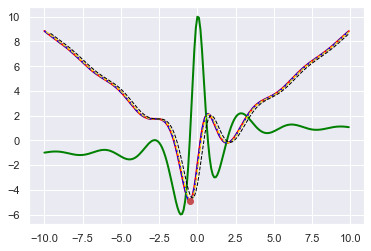

In [133]:
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import fmin

def f(x):
    return (5 * np.sin(2*x) - np.cos(x)**2 - 1 + abs(x**3) - x**2) / (x**2 + 1)


x = np.arange(-10, 10, 0.1)
y = f(x)
diff = derivative(f, x, dx=1e-6)
f_min = fmin(f, np.array([0]))

f_1 = moving_avg(y, 1)
f_2 = moving_avg(y, 2)
f_3 = moving_avg(y, 5)

fig, ax = plt.subplots()

ax.plot(x, y,
        linestyle = '-',
        linewidth = 2,
        color = 'red')

ax.plot(x, diff,
        linestyle = '-',
        linewidth = 2,
        color = 'green')

ax.plot(x, f_1,
        linestyle = '--',
        linewidth = 1.5,
        color = 'blue')

ax.plot(x[1:], f_2,
        linestyle = '--',
        linewidth = 1,
        color = 'yellow')

ax.plot(x[4:], f_3,
        linestyle = '--',
        linewidth = 1,
        color = 'black')

ax.plot(f_min, f(f_min),'ro')
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [2]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 4, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [136]:
import random 
import timeit

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)


2247

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

walk.numpy - 1000 times: 0.13754s
walk.python - 1000 times: 3.76640s


<AxesSubplot:ylabel='Density'>

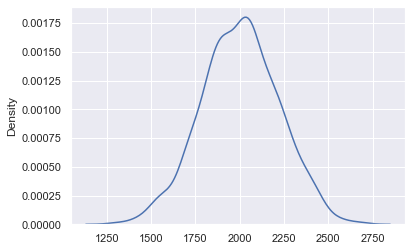

In [137]:
import time
import typing as _t
from functools import wraps


def timeit(count: int, name: _t.Optional[str] = None) -> _t.Callable:
    def wrapper(func: _t.Callable) -> _t.Callable:
        funcname = name if name else func.__name__
        @wraps(func)
        def clock(*args, **kwargs) -> _t.List:
            start = time.time()
            result = [func(*args, **kwargs) for _ in range(count)]
            end = time.time()
            print(f'{funcname} - {count} times: {end - start:.5f}s')
            return result
        return clock
    return wrapper

data = [-3, -1, 0, 2, 3]

@timeit(1000, name='walk.numpy')
def walk_numpy(n: int) -> int:
    return np.random.choice(data, n).sum()

walk_python = timeit(1000, name='walk.python')(walk)

result = walk_numpy(10_000)
walk_python(10_000)
sns.kdeplot(result)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [4]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


-0.13580565475012618

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.